## Deep Learning Lab-3
### Universidad del Valle de Guatemala
#### Nombres: Pablo Gonzalez 20362
#### Jose Hernandez: 20053

In [74]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import LSTM

In [75]:
data = pd.read_csv('data/SunSpots.csv')

##### Visualizacion de datos

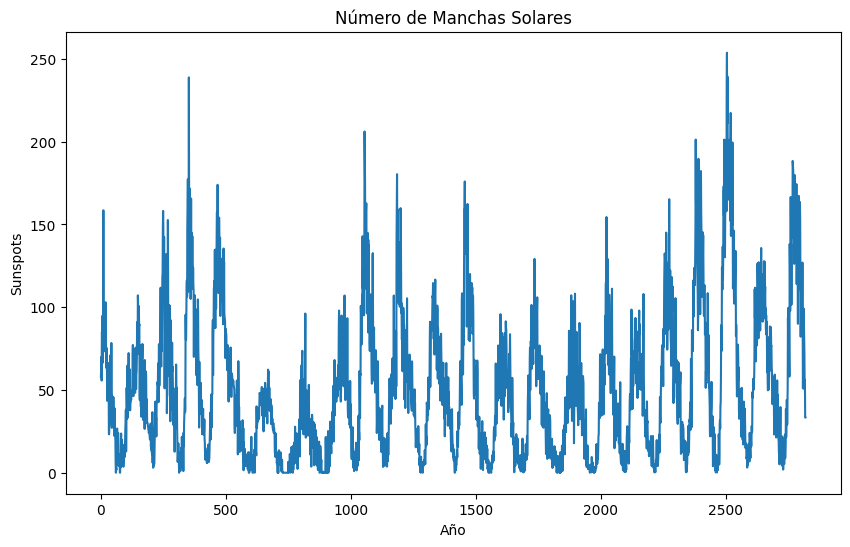

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sunspots'])
plt.title('Número de Manchas Solares')
plt.xlabel('Año')
plt.ylabel('Sunspots')
plt.show()


#### Manejo de datos

In [77]:
# Divide la columna 'Month' en 'year' y 'month'
data['year'] = data['Month'].str.split('-').str[0].astype(int)
data['month'] = data['Month'].str.split('-').str[1].astype(int)

data.rename(columns={'Month': 'date'}, inplace=True)

In [78]:
data

,date,Sunspots,year,month
0,1749-01,58.0,1749,1
1,1749-02,62.6,1749,2
2,1749-03,70.0,1749,3
3,1749-04,55.7,1749,4
4,1749-05,85.0,1749,5
...,...,...,...,...
2815,1983-08,71.8,1983,8
2816,1983-09,50.3,1983,9
2817,1983-10,55.8,1983,10
2818,1983-11,33.3,1983,11


In [79]:
data.dtypes

date         object
Sunspots    float64
year          int32
month         int32
dtype: object

### Feed Forward NN (Red Simple)


In [80]:
X = data[['year','month']]
y = data[['Sunspots']]
X = np.asarray(X)
y = np.asarray(y)

In [81]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [83]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [84]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(2,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);

In [85]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error']
)

In [86]:
batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
53/53 - 4s - loss: 4645.9766 - mean_squared_error: 4645.9766 - val_loss: 4205.0605 - val_mean_squared_error: 4205.0605 - 4s/epoch - 76ms/step
Epoch 2/100
53/53 - 0s - loss: 4603.6289 - mean_squared_error: 4603.6289 - val_loss: 4175.5044 - val_mean_squared_error: 4175.5044 - 182ms/epoch - 3ms/step
Epoch 3/100
53/53 - 0s - loss: 4568.2573 - mean_squared_error: 4568.2573 - val_loss: 4151.4536 - val_mean_squared_error: 4151.4536 - 177ms/epoch - 3ms/step
Epoch 4/100
53/53 - 0s - loss: 4532.1831 - mean_squared_error: 4532.1831 - val_loss: 4132.8862 - val_mean_squared_error: 4132.8862 - 176ms/epoch - 3ms/step
Epoch 5/100
53/53 - 0s - loss: 4498.7168 - mean_squared_error: 4498.7168 - val_loss: 4219.0684 - val_mean_squared_error: 4219.0684 - 179ms/epoch - 3ms/step
Epoch 6/100
53/53 - 0s - loss: 4459.8267 - mean_squared_error: 4459.8267 - val_loss: 4258.7881 - val_mean_squared_error: 4258.7881 - 186ms/epoch - 4ms/step
Epoch 7/100
53/53 - 0s - loss: 4406.8701 - mean_squared_error: 440

In [87]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = batched_model.predict(X_train)
test_predict = batched_model.predict(X_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)


18/18 [==============================] - 0s 1ms/step
Train RMSE: 39.866 RMSE
Test RMSE: 41.215 RMSE


In [88]:
test_predict

array([[63.222668],
       [75.81391 ],
       [31.87254 ],
       [59.53317 ],
       [85.281204],
       [66.37379 ],
       [42.325558],
       [89.21022 ],
       [73.95017 ],
       [37.816547],
       [56.361057],
       [44.85246 ],
       [48.29311 ],
       [80.54617 ],
       [35.36781 ],
       [55.350914],
       [86.027596],
       [77.04607 ],
       [73.9863  ],
       [53.456272],
       [82.539696],
       [44.22538 ],
       [44.71363 ],
       [47.181644],
       [38.44073 ],
       [45.33231 ],
       [35.77477 ],
       [57.502544],
       [54.70003 ],
       [33.616955],
       [61.364323],
       [38.454693],
       [68.94447 ],
       [29.151009],
       [40.235416],
       [35.3307  ],
       [42.480686],
       [57.46787 ],
       [62.120075],
       [33.944576],
       [58.813583],
       [72.8112  ],
       [81.8483  ],
       [75.74042 ],
       [50.447422],
       [47.550312],
       [65.303665],
       [34.957157],
       [35.01672 ],
       [55.169872],


### Red neuronal RNN

In [89]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [90]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [91]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
time_steps = 12

trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [92]:
model2 = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
model2.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0140 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0093 - 360ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0076 - 346ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0067 - 347ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0061 - 362ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0057 - 366ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0054 - 361ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0052 - 390ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0050 - 396ms/epoch - 2ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0048 - 500ms/epoch - 3ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0047 - 450ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0046 - 340ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0045 - 334ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0043 - 330ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0043 - 348ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [93]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model2.predict(trainX)
test_predict = model2.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 4ms/step
Train RMSE: 0.063 RMSE
Test RMSE: 0.082 RMSE


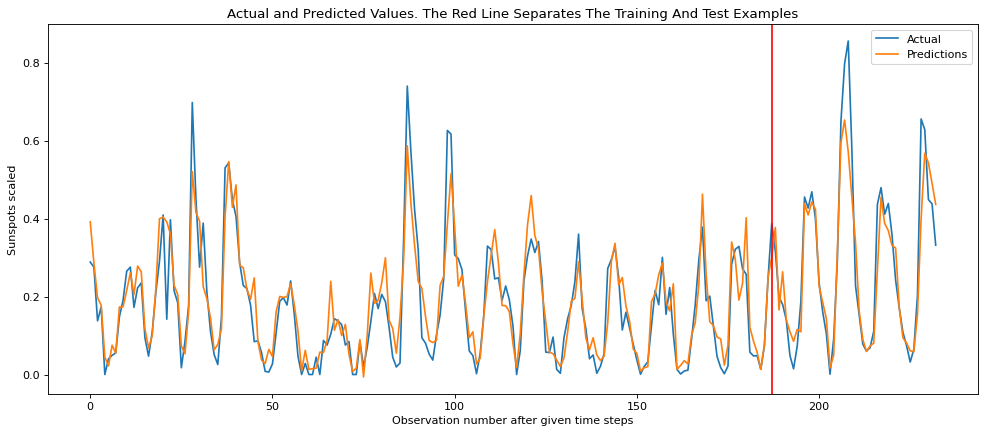

In [94]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

### Red neuronal LSTM

In [95]:
data3 = pd.read_csv("./data/SunSpots.csv")
sunspots = data3["Sunspots"].values.astype(float)

In [96]:
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots_scaled = scaler.fit_transform(sunspots.reshape(-1, 1))

In [97]:
train_size = int(len(sunspots_scaled) * 0.67)
train_data3, test_data3 = sunspots_scaled[0:train_size], sunspots_scaled[train_size:len(sunspots_scaled)]

In [98]:
def create_sequences(data3, seq_length):
    X, y = [], []
    for i in range(len(data3) - seq_length):
        seq = data3[i:i + seq_length]
        label = data3[i + seq_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

seq_length = 12  # Longitud de la secuencia
X_train3, y_train3 = create_sequences(train_data3, seq_length)
X_test3, y_test3 = create_sequences(test_data3, seq_length)

In [100]:
model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train3, y_train3, epochs=50, batch_size=64)

Epoch 1/50
30/30 [==============================] - 2s 6ms/step - loss: 0.0429
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 3/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 8/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 9/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 10/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 11/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 12/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 13/50
30/30 [==============================

In [101]:
train_predictions3 = model3.predict(X_train3)
test_predictions3 = model3.predict(X_test3)

29/29 [==============================] - 0s 2ms/step


In [103]:
train_predictions3 = scaler.inverse_transform(train_predictions3)
y_train3 = scaler.inverse_transform(y_train3)
test_predictions3 = scaler.inverse_transform(test_predictions3)
y_test3 = scaler.inverse_transform(y_test3)

In [105]:
print_error(y_train3, y_test3, train_predictions3, test_predictions3)

Train RMSE: 15198.552 RMSE
Test RMSE: 17.447 RMSE


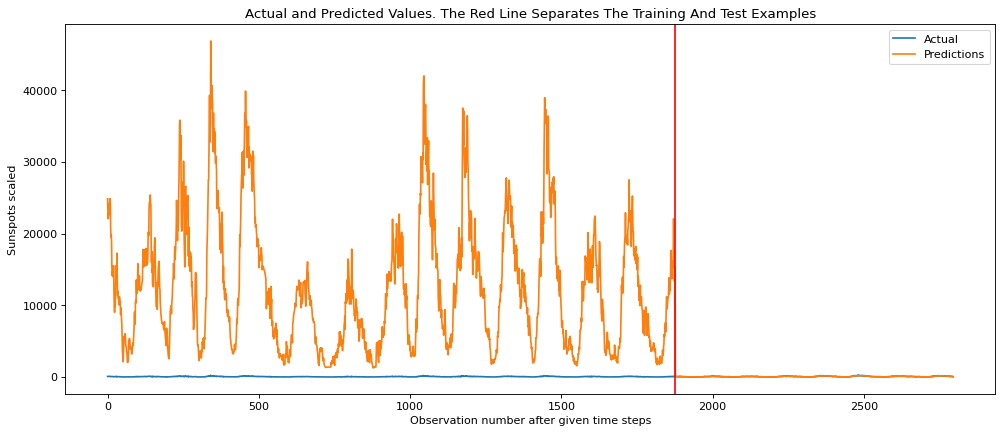

In [107]:
plot_result(y_train3, y_test3, train_predictions3, test_predictions3)